In [1]:
import matplotlib.pyplot as plt
import scipy.io 
import numpy as np
from IPython.display import HTML
import matplotlib.animation as anim
import plotly.graph_objects as go

import hj_reachability as hj

load trajectory and grid dimensions


In [4]:
##.npy to .mat
data_npy = np.load('reldyn5d_brs_mode0.npy')

# Convert to .mat and save
scipy.io.savemat('Bajcsy_Brt.mat', {'data': data_npy})

In [76]:
data = scipy.io.loadmat('reldyn5d_brs_mode0.mat')
xr = data['xr'].flatten() 
yr = data['yr'].flatten() 
grid_size = data['grid_size']
l =  np.array(data["grid_min"]).flatten()
u = np.array(data["grid_max"]).flatten()
ls = np.array(data["sGridmin"]).flatten()
us = np.array(data["sGridmax"]).flatten()
print(grid_size)



[[13 13 13 12 21]]


In [77]:
grid = hj.Grid.from_lattice_parameters_and_boundary_conditions(hj.sets.Box(ls,
                                                                           us),
                                                               (13,13,13,12,21),
                                                               periodic_dims=2)

In [78]:
V = data["value_function"]
Vmy = data["mydata"]
Vs = data["SmallValues"]
target_values = V[:,:,:,:,:,-1]
Mytarget_values = np.array(Vmy[:,:,:,:,:,-1])
smallValues = np.array(Vs[:,:,:,:,:,-1])
print(Mytarget_values)

[[[[[85.83202412 84.95470685 84.02649465 ... 71.9388399  71.79087412
     71.74117269]
    [86.91590006 86.17407489 85.34368993 ... 73.64157922 73.49389104
     73.44417762]
    [87.72439023 87.19119091 86.51241302 ... 75.35390601 75.20661878
     75.15691575]
    ...
    [88.13878189 88.13878189 88.13878189 ... 85.73077766 85.6005536
     85.5523088 ]
    [88.13878189 88.13878189 88.13878189 ... 86.88473022 86.76827418
     86.72199296]
    [88.13878189 88.13878189 88.13878189 ... 88.00116839 87.90994629
     87.86923445]]

   [[86.36226656 85.63467944 84.86180426 ... 74.39517428 74.26245305
     74.21784237]
    [87.34903262 86.77509188 86.12823723 ... 76.33705946 76.20597274
     76.16172158]
    [87.97718485 87.62548001 87.144668   ... 78.16718265 78.03759846
     77.99356058]
    ...
    [88.13878189 88.13878189 88.13878189 ... 86.80788471 86.7158986
     86.67780206]
    [88.13878189 88.13878189 88.13878189 ... 87.48028977 87.41277542
     87.38105246]
    [88.13878189 88.1387818

<Figure size 640x480 with 0 Axes>

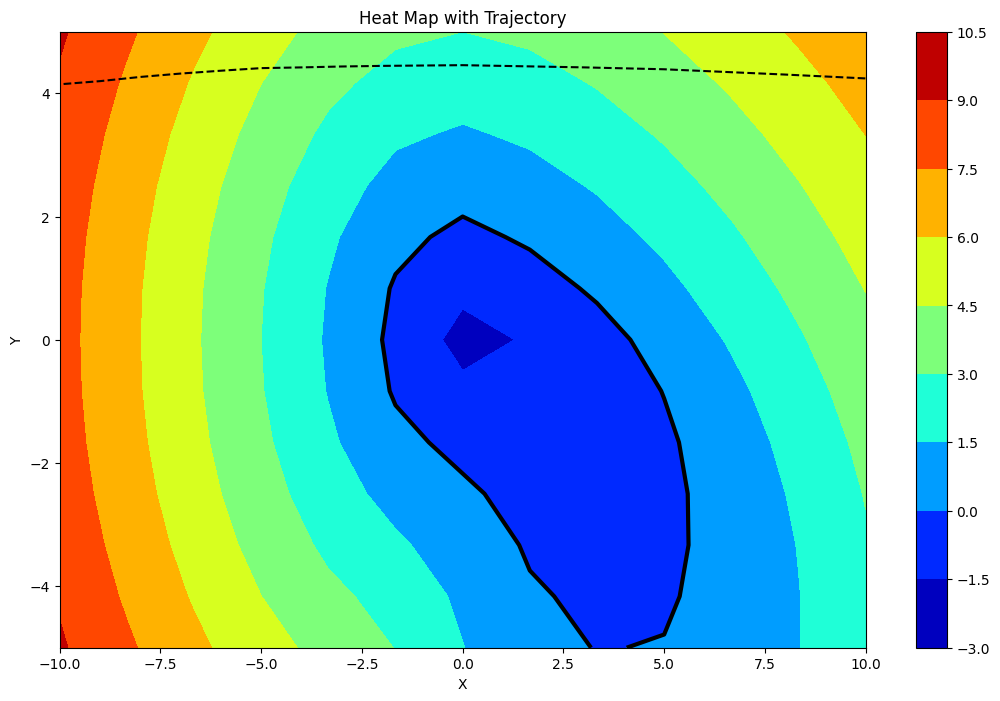

In [79]:
plt.jet()
plt.figure(figsize=(13, 8))

# Plot the heat map
plt.contourf(grid.coordinate_vectors[0], grid.coordinate_vectors[1], smallValues[:, :, 0,8,5].T)
plt.colorbar()

# Plot the contour line
plt.contour(grid.coordinate_vectors[0],
            grid.coordinate_vectors[1],
            smallValues[:, :, 0,8,5].T,
            levels=0,
            colors="black",
            linewidths=3)

# Plot the trajectory
plt.plot(xr[::-1], yr[::-1], 'k--')
plt.xlim(-10, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heat Map with Trajectory')
plt.show()